Chargement de : Voiture
Images chargés avec succés

Chargement de : Bateau
Images chargés avec succés

saisir le chemin de l'image :C:/Users/Khaoula/Reconnaissance_de_formes/Classification_Voiture_SVM/Test/29011.jpg


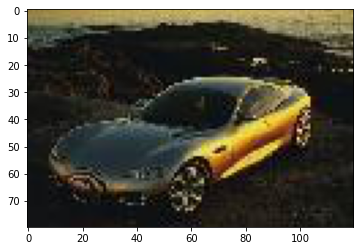

L'image prédit est une voiture

saisir le chemin de l'image :C:/Users/Khaoula/Reconnaissance_de_formes/Classification_Voiture_SVM/Test/535010.jpg


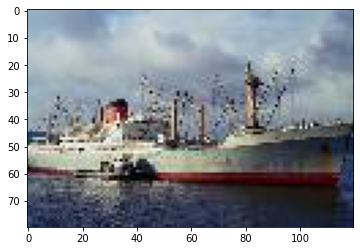

L'image prédit est un bateau



In [ ]:

import os
from sklearn import svm
from skimage.io import imread
import numpy as np
import cv2
import matplotlib.pyplot as plt

Vehicules = ['Voiture','Bateau']
flat_data_arr=[] #entrée 
target_arr=[] #sortie
#chemin qui contient les types de véhicules :
datadir='Database/' 
for i in Vehicules:
    print(f'Chargement de : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        ret,img_binarised =cv2.threshold(img_array,128,1,cv2.THRESH_BINARY)
        flat_data_arr.append(img_binarised.flatten())
        target_arr.append(Vehicules.index(i))
    print('Images chargés avec succés\n')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

#Création d'un vecteur de support
svc=svm.SVC(probability=True)
svc.fit(flat_data,target)

#une boucle pour tester tous les images à pédire
for i in range(20):
    url=input("saisir le chemin de l'image :")
    img=imread(url)
    plt.imshow(img)
    plt.show()
    ret,img_binarised =cv2.threshold(img,128,1,cv2.THRESH_BINARY)
    if Vehicules[svc.predict([img_binarised.flatten()])[0]] == 'Voiture':
        print("L'image prédit est une voiture\n")
    else:
        print("L'image prédit est un bateau\n")